In [ ]:
# Core
import numpy as np
import pandas as pd

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Make plots look nicer
plt.style.use("seaborn-v0_8")
sns.set(font_scale=1.1)

# Ignore annoying warnings
import warnings
warnings.filterwarnings("ignore")


In [ ]:
# Load training dataset
df = pd.read_csv("/train_dataset.csv")

# Peek at first few rows
df.head()


,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,35,170,85,97.0,0.9,0.9,1,1,118,78,...,70,142,19.8,1,1.0,61,115,125,1,1
1,20,175,110,110.0,0.7,0.9,1,1,119,79,...,71,114,15.9,1,1.1,19,25,30,1,0
2,45,155,65,86.0,0.9,0.9,1,1,110,80,...,57,112,13.7,3,0.6,1090,1400,276,0,0
3,45,165,80,94.0,0.8,0.7,1,1,158,88,...,46,91,16.9,1,0.9,32,36,36,0,0
4,20,165,60,81.0,1.5,0.1,1,1,109,64,...,47,92,14.9,1,1.2,26,28,15,0,0


In [ ]:
print("Shape of dataset:", df.shape)

print("\nInfo:")
df.info()

print("\nMissing values per column:")
print(df.isnull().sum())

print("\nBasic statistics (numerical columns):")
df.describe().T


Shape of dataset: (38984, 23)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38984 entries, 0 to 38983
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  38984 non-null  int64  
 1   height(cm)           38984 non-null  int64  
 2   weight(kg)           38984 non-null  int64  
 3   waist(cm)            38984 non-null  float64
 4   eyesight(left)       38984 non-null  float64
 5   eyesight(right)      38984 non-null  float64
 6   hearing(left)        38984 non-null  int64  
 7   hearing(right)       38984 non-null  int64  
 8   systolic             38984 non-null  int64  
 9   relaxation           38984 non-null  int64  
 10  fasting blood sugar  38984 non-null  int64  
 11  Cholesterol          38984 non-null  int64  
 12  triglyceride         38984 non-null  int64  
 13  HDL                  38984 non-null  int64  
 14  LDL                  38984 non-null  int64  
 15 

,count,mean,std,min,25%,50%,75%,max
age,38984.0,44.127591,12.063564,20.0,40.0,40.0,55.0,85.0
height(cm),38984.0,164.689488,9.187507,130.0,160.0,165.0,170.0,190.0
weight(kg),38984.0,65.938718,12.896581,30.0,55.0,65.0,75.0,135.0
waist(cm),38984.0,82.062115,9.326798,51.0,76.0,82.0,88.0,129.0
eyesight(left),38984.0,1.014955,0.498527,0.1,0.8,1.0,1.2,9.9
eyesight(right),38984.0,1.008768,0.493813,0.1,0.8,1.0,1.2,9.9
hearing(left),38984.0,1.025369,0.157246,1.0,1.0,1.0,1.0,2.0
hearing(right),38984.0,1.026190,0.159703,1.0,1.0,1.0,1.0,2.0
systolic,38984.0,121.475631,13.643521,71.0,112.0,120.0,130.0,233.0
relaxation,38984.0,75.994408,9.658734,40.0,70.0,76.0,82.0,146.0


In [ ]:
print("Columns:\n", df.columns.tolist())

# Identify numeric vs potential categorical
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns.tolist()
print("\nNumeric columns:\n", numeric_cols)

# Heuristic: integer columns with few unique values -> categorical-like
potential_cat = []
for col in numeric_cols:
    if df[col].nunique() <= 10 and col != "smoking":
        potential_cat.append(col)

print("\nPotential categorical columns (encoded as integers):")
print(potential_cat)


Columns:
 ['age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)', 'eyesight(right)', 'hearing(left)', 'hearing(right)', 'systolic', 'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride', 'HDL', 'LDL', 'hemoglobin', 'Urine protein', 'serum creatinine', 'AST', 'ALT', 'Gtp', 'dental caries', 'smoking']

Numeric columns:
 ['age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)', 'eyesight(right)', 'hearing(left)', 'hearing(right)', 'systolic', 'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride', 'HDL', 'LDL', 'hemoglobin', 'Urine protein', 'serum creatinine', 'AST', 'ALT', 'Gtp', 'dental caries', 'smoking']

Potential categorical columns (encoded as integers):
['hearing(left)', 'hearing(right)', 'Urine protein', 'dental caries']


Smoking value counts:
smoking
0    24666
1    14318
Name: count, dtype: int64

Smoking proportion:
smoking
0    0.632721
1    0.367279
Name: proportion, dtype: float64


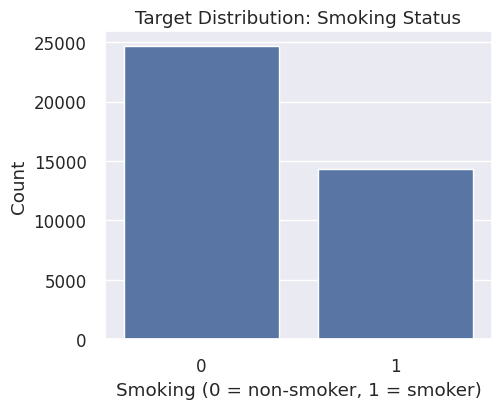

In [ ]:
# Value counts
print("Smoking value counts:")
print(df["smoking"].value_counts())
print("\nSmoking proportion:")
print(df["smoking"].value_counts(normalize=True))

# Plot
plt.figure(figsize=(5,4))
sns.countplot(x="smoking", data=df)
plt.title("Target Distribution: Smoking Status")
plt.xlabel("Smoking (0 = non-smoker, 1 = smoker)")
plt.ylabel("Count")
plt.show()


In [ ]:
cat_cols = potential_cat + ["smoking"]
cat_cols = list(dict.fromkeys(cat_cols))  # remove duplicates

for col in cat_cols:
    print(f"\n===== {col} =====")
    print(df[col].value_counts())



===== hearing(left) =====
hearing(left)
1    37995
2      989
Name: count, dtype: int64

===== hearing(right) =====
hearing(right)
1    37963
2     1021
Name: count, dtype: int64

===== Urine protein =====
Urine protein
1    36836
2     1236
3      667
4      182
5       58
6        5
Name: count, dtype: int64

===== dental caries =====
dental caries
0    30625
1     8359
Name: count, dtype: int64

===== smoking =====
smoking
0    24666
1    14318
Name: count, dtype: int64


Continuous numeric columns:
 ['age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)', 'eyesight(right)', 'systolic', 'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride', 'HDL', 'LDL', 'hemoglobin', 'serum creatinine', 'AST', 'ALT', 'Gtp']


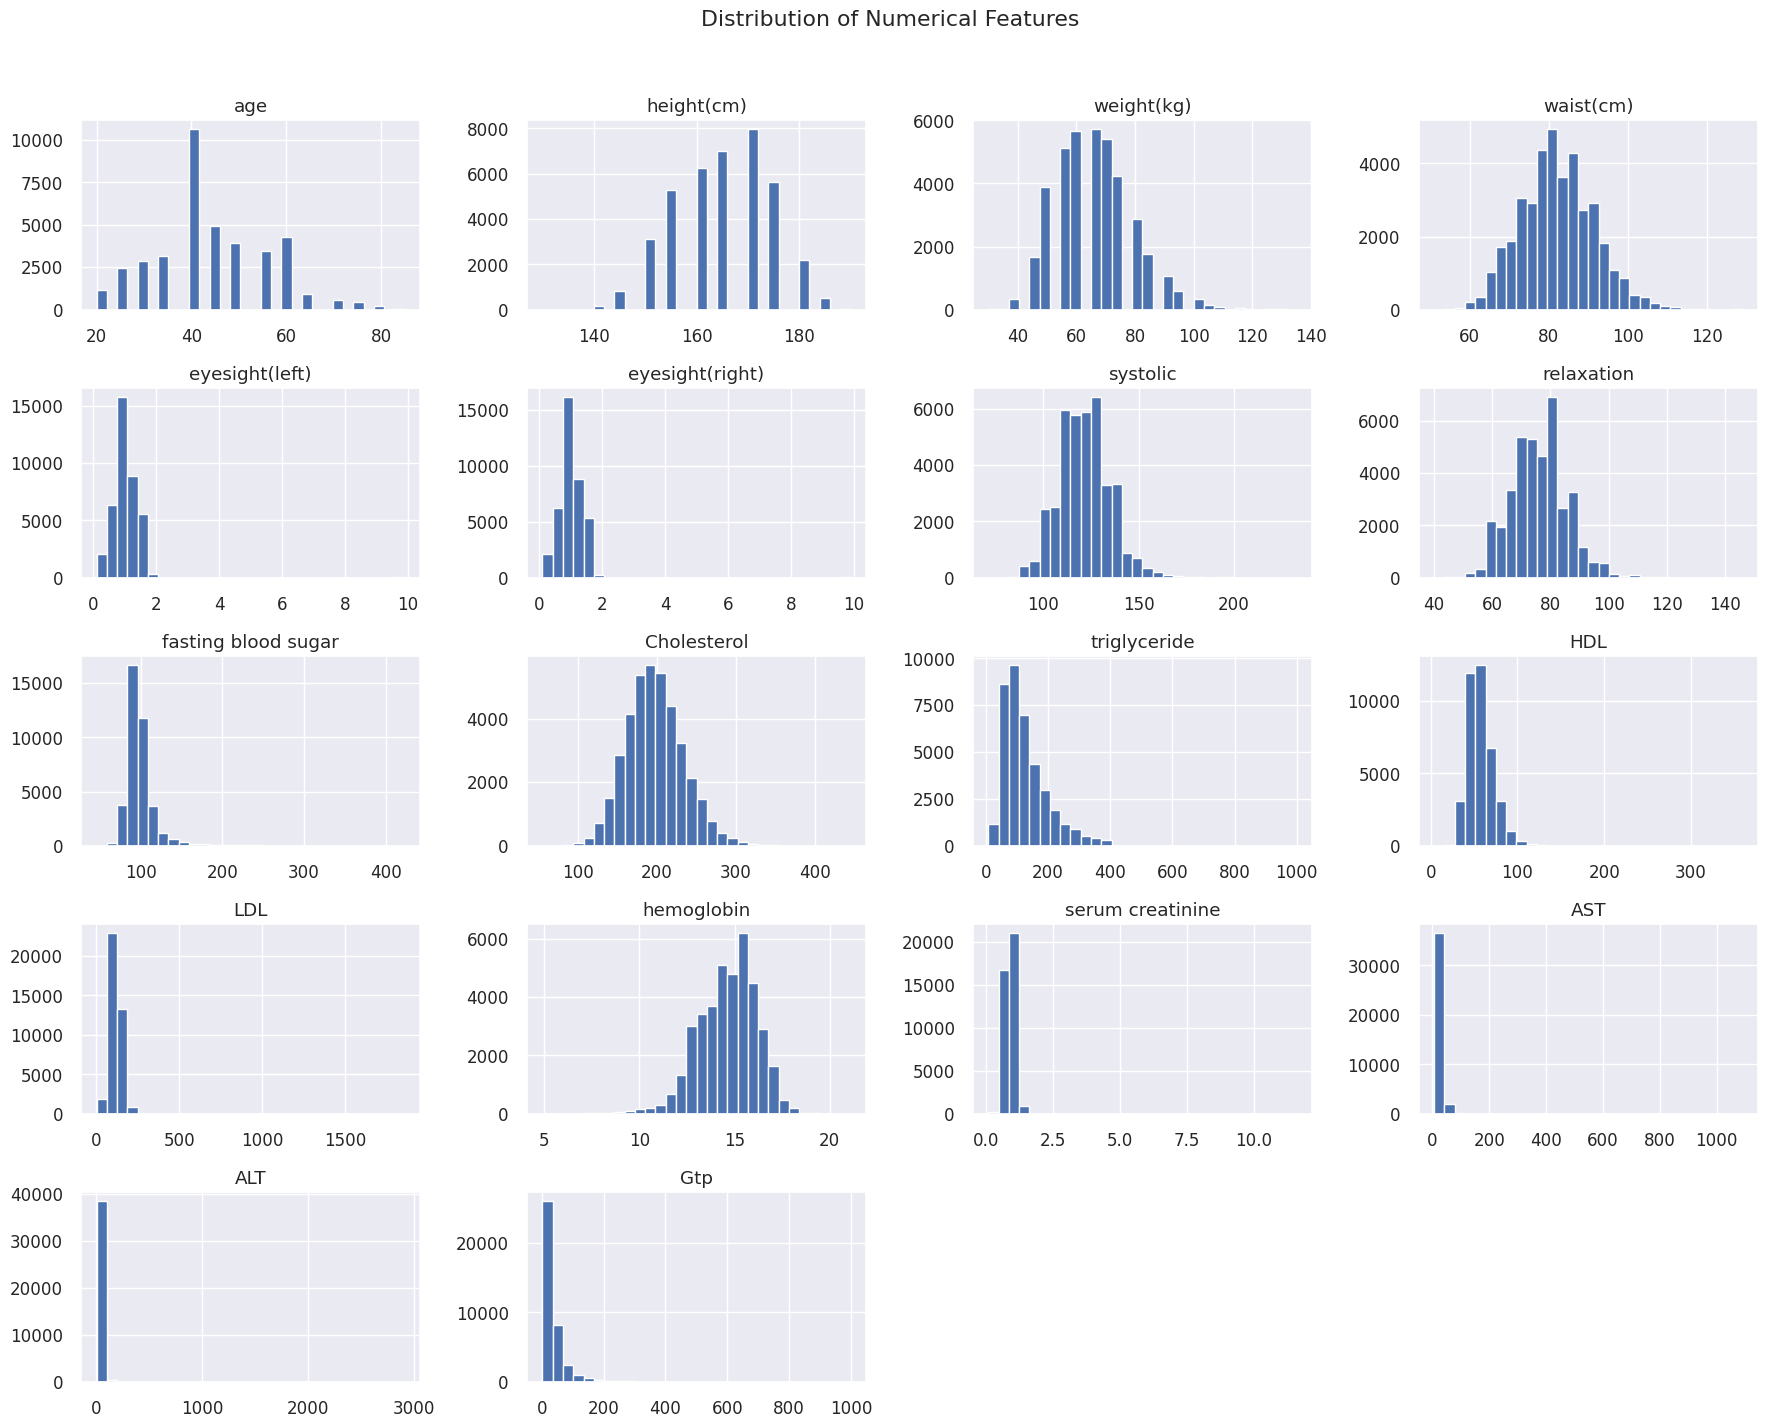

In [ ]:
num_cols = [c for c in numeric_cols if c not in cat_cols]  # purely continuous-ish features

print("Continuous numeric columns:\n", num_cols)

df[num_cols].hist(figsize=(18, 14), bins=30)
plt.suptitle("Distribution of Numerical Features", y=1.02)
plt.tight_layout()
plt.show()


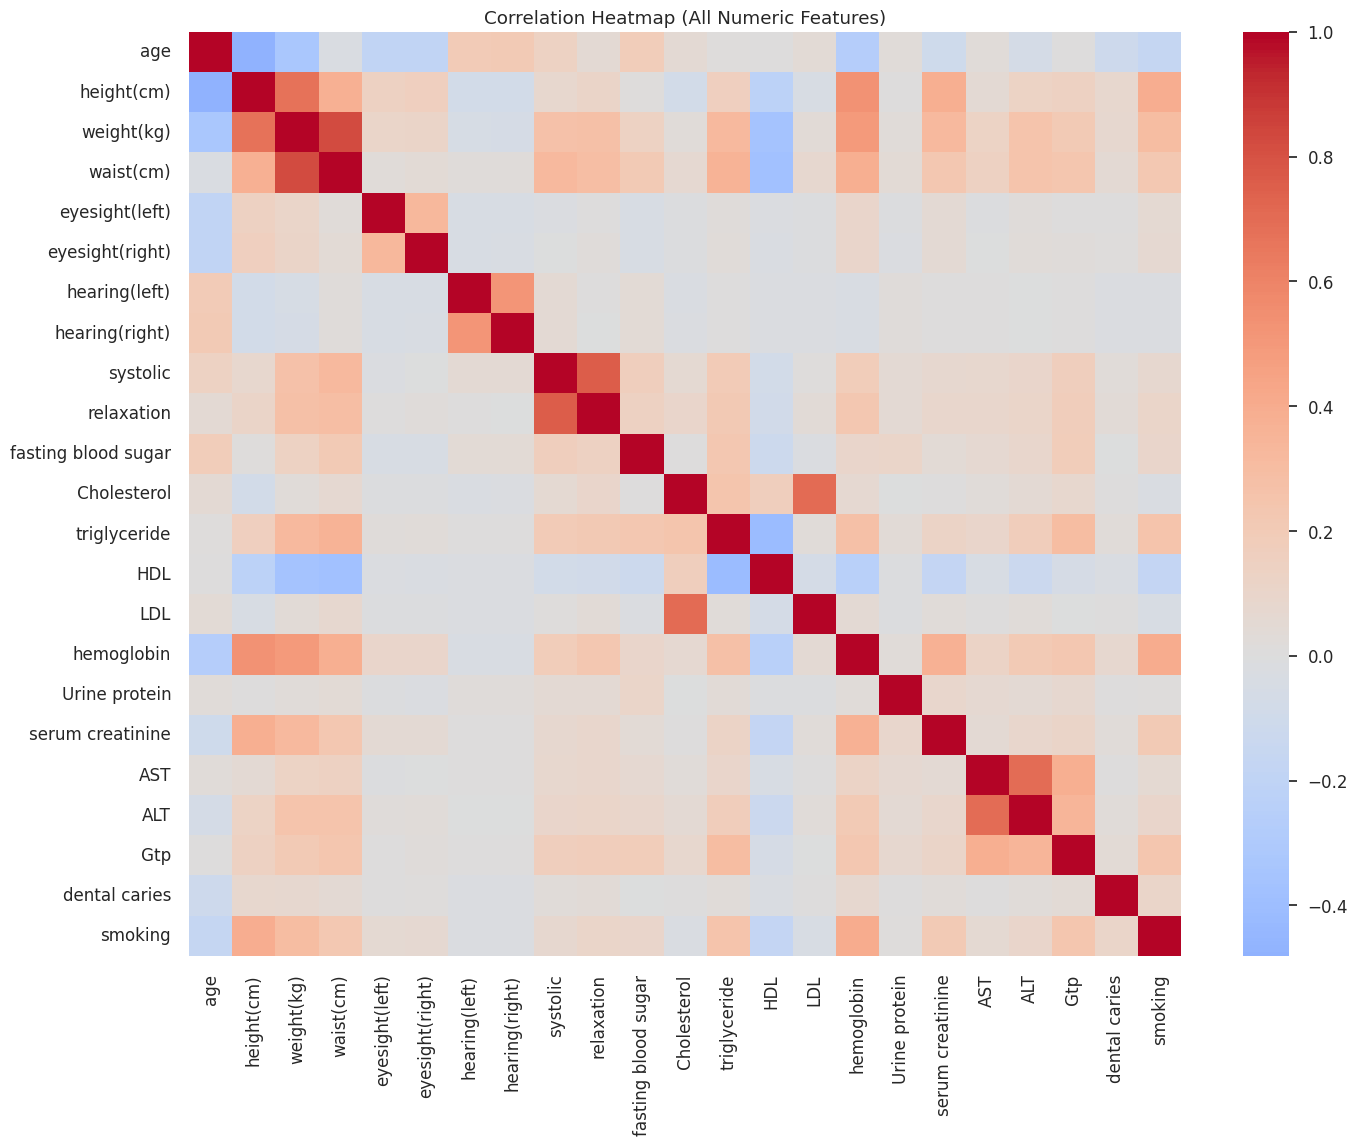


Correlation of features with 'smoking':


,smoking
smoking,1.000000
hemoglobin,0.401206
height(cm),0.394314
weight(kg),0.299347
triglyceride,0.251057
Gtp,0.240274
waist(cm),0.223359
serum creatinine,0.212473
dental caries,0.107601
relaxation,0.103663


In [ ]:
plt.figure(figsize=(16, 12))
corr = df.corr()
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap (All Numeric Features)")
plt.show()

# Correlation of each feature with target 'smoking'
print("\nCorrelation of features with 'smoking':")
corr_with_target = corr["smoking"].sort_values(ascending=False)
corr_with_target


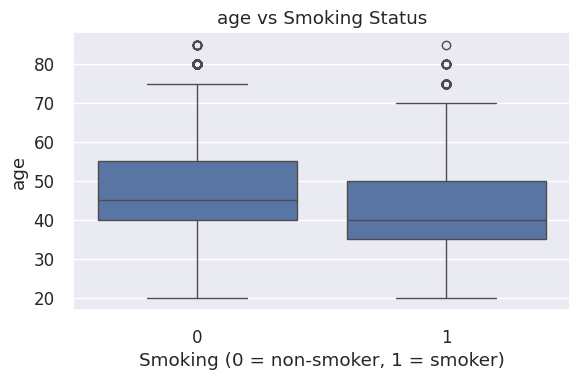

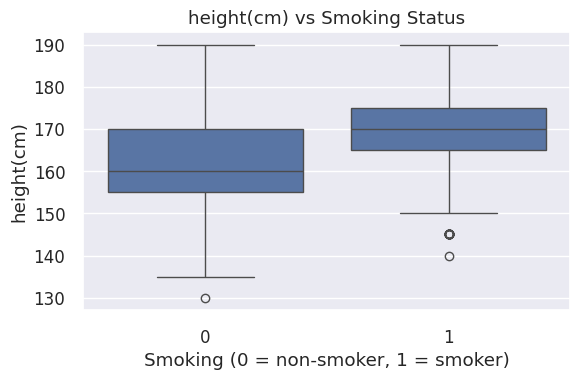

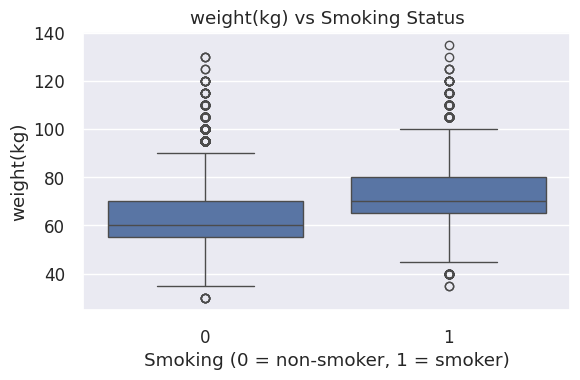

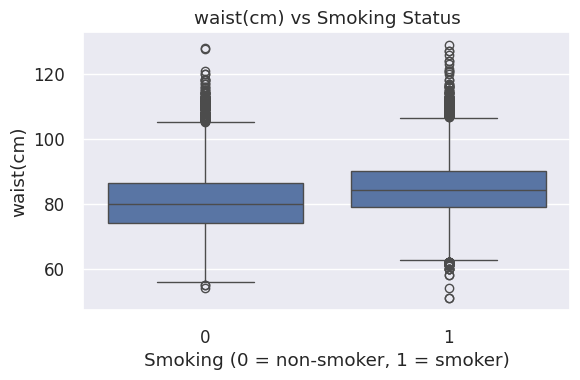

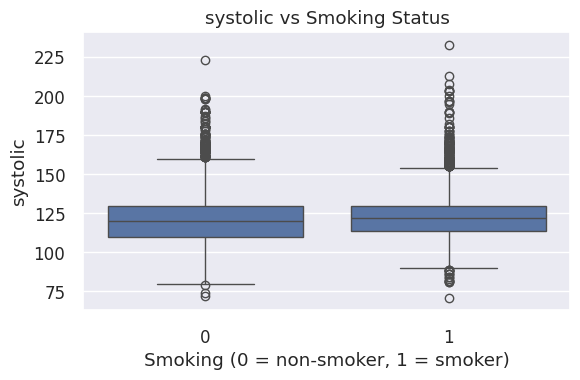

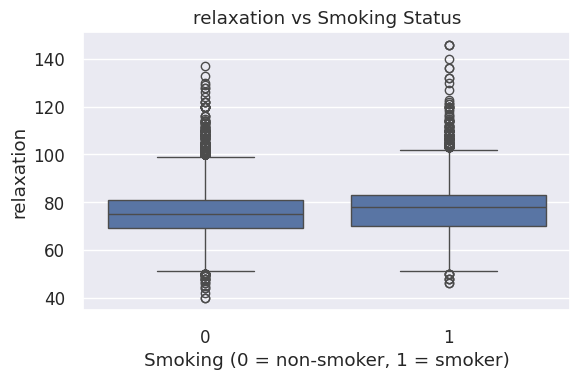

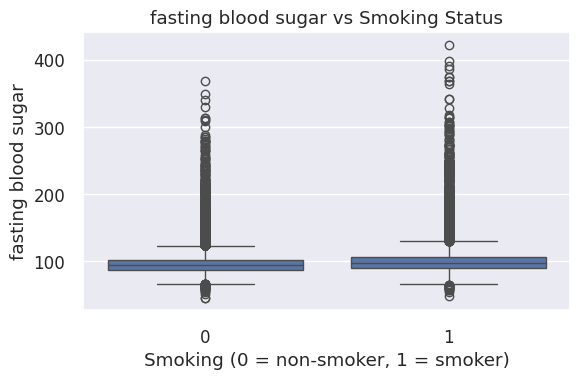

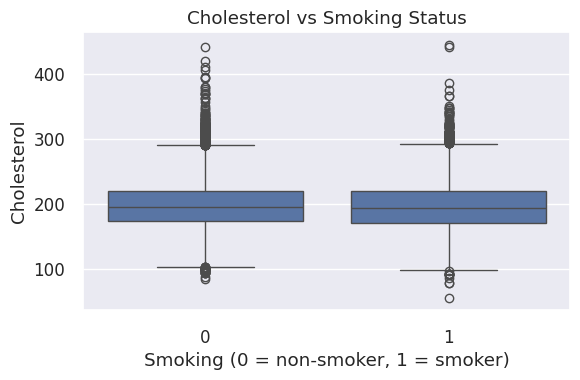

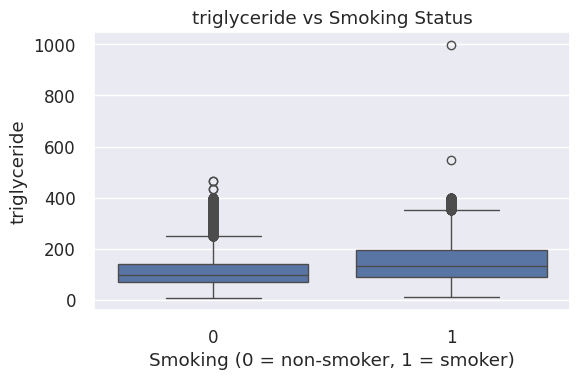

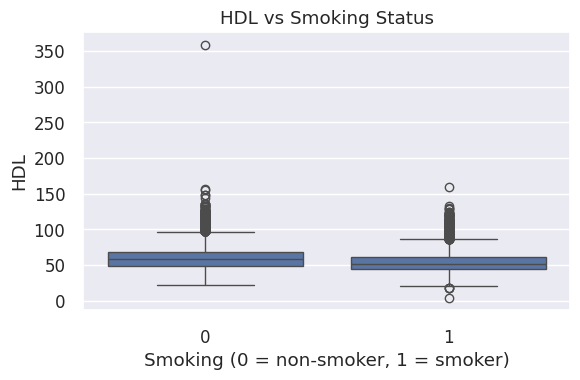

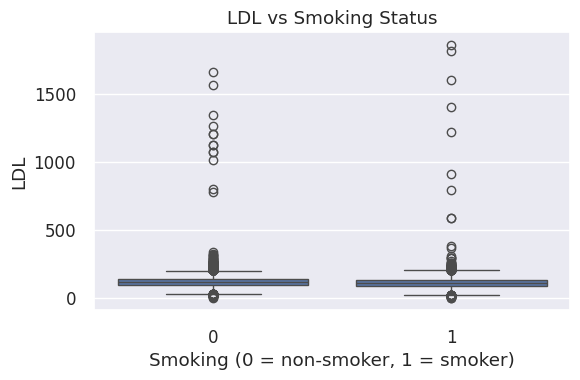

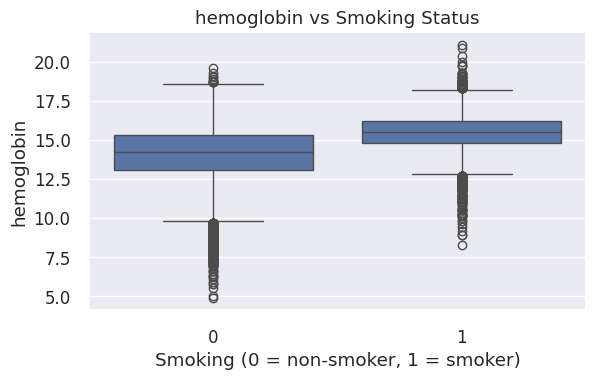

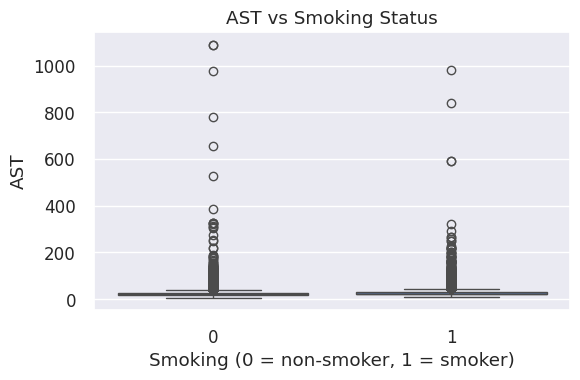

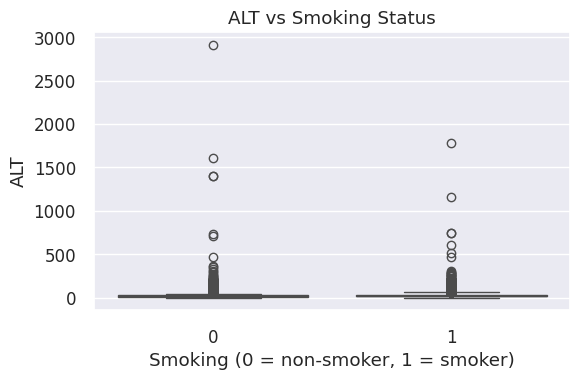

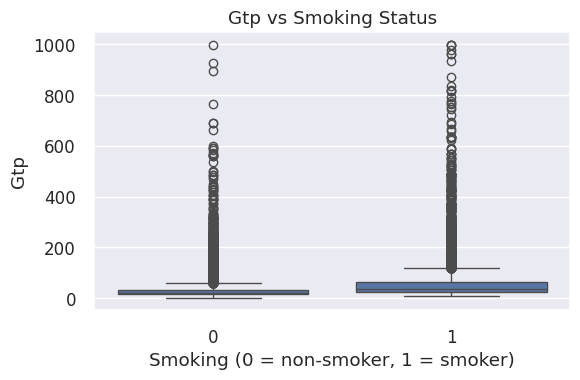

In [ ]:
# Choose a subset of interesting health features
key_features = [
    "age", "height(cm)", "weight(kg)", "waist(cm)",
    "systolic", "relaxation",
    "fasting blood sugar", "Cholesterol",
    "triglyceride", "HDL", "LDL",
    "hemoglobin", "AST", "ALT", "Gtp"
]

for col in key_features:
    if col in df.columns:
        plt.figure(figsize=(6,4))
        sns.boxplot(x="smoking", y=col, data=df)
        plt.title(f"{col} vs Smoking Status")
        plt.xlabel("Smoking (0 = non-smoker, 1 = smoker)")
        plt.ylabel(col)
        plt.tight_layout()
        plt.show()


In [ ]:
group_stats = df.groupby("smoking")[numeric_cols].mean().T
group_stats.columns = ["Non-smokers (0)", "Smokers (1)"]
group_stats["Difference (1 - 0)"] = group_stats["Smokers (1)"] - group_stats["Non-smokers (0)"]
group_stats.sort_values("Difference (1 - 0)", ascending=False)


,Non-smokers (0),Smokers (1),Difference (1 - 0)
triglyceride,113.015325,150.409624,37.394300
Gtp,30.808076,55.576617,24.768541
weight(kg),62.997446,71.005727,8.008281
height(cm),161.929376,169.444406,7.515029
ALT,24.792792,31.197723,6.404931
waist(cm),80.474949,84.796368,4.321419
fasting blood sugar,97.770980,102.049169,4.278189
AST,25.280264,27.779648,2.499384
relaxation,75.231574,77.308563,2.076989
systolic,120.746169,122.732295,1.986126


In [ ]:
skew_values = df[num_cols].skew().sort_values(ascending=False)
print("Skewness of numerical features:\n")
print(skew_values)


Skewness of numerical features:

ALT                    36.169306
AST                    24.000164
LDL                    11.764551
eyesight(right)        10.117849
eyesight(left)         10.107092
serum creatinine        9.025683
Gtp                     6.775446
fasting blood sugar     4.323974
triglyceride            1.336626
HDL                     1.086995
weight(kg)              0.544821
systolic                0.458719
Cholesterol             0.417539
relaxation              0.411830
age                     0.278093
waist(cm)               0.262021
height(cm)             -0.144438
hemoglobin             -0.667448
dtype: float64


In [ ]:
import numpy as np
import pandas as pd

# Make a working copy
data = df.copy()

# Clean column names: strip spaces, remove brackets, unify style
data.columns = (
    data.columns
        .str.strip()
        .str.replace(" ", "_")
        .str.replace("(", "", regex=False)
        .str.replace(")", "", regex=False)
        .str.replace("/", "_", regex=False)
        .str.lower()
)

print("Columns after renaming:\n", data.columns.tolist())


Columns after renaming:
 ['age', 'heightcm', 'weightkg', 'waistcm', 'eyesightleft', 'eyesightright', 'hearingleft', 'hearingright', 'systolic', 'relaxation', 'fasting_blood_sugar', 'cholesterol', 'triglyceride', 'hdl', 'ldl', 'hemoglobin', 'urine_protein', 'serum_creatinine', 'ast', 'alt', 'gtp', 'dental_caries', 'smoking']


In [ ]:
# Fill numeric NaNs with median
data = data.fillna(data.median(numeric_only=True))

# If you want to be extra safe for discrete/categorical codes:
for col in ["hearingleft", "hearingright", "urine_protein", "dental_caries"]:
    if col in data.columns:
        data[col] = data[col].fillna(data[col].mode()[0])


In [ ]:
categorical_like = []

for col in data.columns:
    if col == "smoking":
        continue
    if data[col].dtype in ["int64", "int32"] and data[col].nunique() <= 10:
        categorical_like.append(col)

print("Categorical-like integer features:", categorical_like)

# Optionally cast them to category dtype for clarity
for col in categorical_like:
    data[col] = data[col].astype("category")


Categorical-like integer features: ['hearingleft', 'hearingright', 'urine_protein', 'dental_caries']


In [ ]:
# --- 4.1 BMI ---
if {"weightkg", "heightcm"}.issubset(data.columns):
    data["bmi"] = data["weightkg"] / (data["heightcm"] / 100) ** 2

# --- 4.2 Waist-to-height ratio ---
if {"waistcm", "heightcm"}.issubset(data.columns):
    data["waist_to_height"] = data["waistcm"] / data["heightcm"]

# --- 4.3 Blood pressure derived features ---
if {"systolic", "relaxation"}.issubset(data.columns):
    # Pulse pressure = systolic - diastolic
    data["pulse_pressure"] = data["systolic"] - data["relaxation"]
    # Ratio (how "intense" the systolic is relative to diastolic)
    data["bp_ratio"] = data["systolic"] / data["relaxation"]

# --- 4.4 Lipid ratios (cardio-metabolic risk) ---
if {"ldl", "hdl"}.issubset(data.columns):
    data["ldl_to_hdl"] = data["ldl"] / data["hdl"]

if {"cholesterol", "hdl"}.issubset(data.columns):
    data["cholesterol_to_hdl"] = data["cholesterol"] / data["hdl"]

# --- 4.5 Liver enzyme ratio (AST/ALT) ---
if {"ast", "alt"}.issubset(data.columns):
    data["ast_alt_ratio"] = data["ast"] / data["alt"]

# --- 4.6 Log-transform skewed lab values ---
skewed_cols = []
for col in ["triglyceride", "cholesterol", "gtp", "fasting_blood_sugar"]:
    if col in data.columns:
        new_name = col + "_log"
        data[new_name] = np.log1p(data[col])  # log(1 + x)
        skewed_cols.append(new_name)

print("Created log-transformed features:", skewed_cols)


Created log-transformed features: ['triglyceride_log', 'cholesterol_log', 'gtp_log', 'fasting_blood_sugar_log']


In [ ]:
# Identify numeric columns
num_cols = data.select_dtypes(include=["int64", "float64"]).columns.tolist()

# Exclude target + categorical-like from capping
exclude_from_capping = ["smoking"] + categorical_like
continuous_cols = [c for c in num_cols if c not in exclude_from_capping]

def cap_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] < lower, lower,
                       np.where(df[col] > upper, upper, df[col]))
    return df

for col in continuous_cols:
    data = cap_outliers(data, col)

print("Number of continuous features capped for outliers:", len(continuous_cols))


Number of continuous features capped for outliers: 29


In [ ]:
print("Final shape after preprocessing + feature engineering:", data.shape)

print("\nSample rows:")
data.head()


Final shape after preprocessing + feature engineering: (38984, 34)

Sample rows:


,age,heightcm,weightkg,waistcm,eyesightleft,eyesightright,hearingleft,hearingright,systolic,relaxation,...,waist_to_height,pulse_pressure,bp_ratio,ldl_to_hdl,cholesterol_to_hdl,ast_alt_ratio,triglyceride_log,cholesterol_log,gtp_log,fasting_blood_sugar_log
0,35.0,170.0,85.0,97.0,0.9,0.9,1,1,118.0,78.0,...,0.570588,40.0,1.512821,2.028571,3.414286,0.530435,5.036953,5.480639,4.836282,4.584967
1,20.0,175.0,105.0,106.0,0.7,0.9,1,1,119.0,79.0,...,0.628571,40.0,1.506329,1.605634,2.971831,0.760000,4.859812,5.356586,3.433987,4.488636
2,45.0,155.0,65.0,86.0,0.9,0.9,1,1,110.0,80.0,...,0.554839,30.0,1.375000,1.964912,3.385965,0.778571,4.795791,5.267858,5.181099,4.394449
3,45.0,165.0,80.0,94.0,0.8,0.7,1,1,157.0,88.0,...,0.569697,65.0,1.795455,1.978261,4.565217,0.888889,5.905362,5.351858,3.610918,4.885186
4,20.0,165.0,60.0,81.0,1.5,0.2,1,1,109.0,64.0,...,0.490909,45.0,1.703125,1.957447,3.808511,0.928571,5.303305,5.192957,2.772589,4.615121


In [ ]:
set(data.columns) - set(df.columns)


{'alt',
 'ast',
 'ast_alt_ratio',
 'bmi',
 'bp_ratio',
 'cholesterol',
 'cholesterol_log',
 'cholesterol_to_hdl',
 'dental_caries',
 'eyesightleft',
 'eyesightright',
 'fasting_blood_sugar',
 'fasting_blood_sugar_log',
 'gtp',
 'gtp_log',
 'hdl',
 'hearingleft',
 'hearingright',
 'heightcm',
 'ldl',
 'ldl_to_hdl',
 'pulse_pressure',
 'serum_creatinine',
 'triglyceride_log',
 'urine_protein',
 'waist_to_height',
 'waistcm',
 'weightkg'}

In [ ]:
# Create feature matrix X and target y
X = data.drop(columns=["smoking"])
y = data["smoking"]


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [ ]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

log_base = LogisticRegression(
    max_iter=1500,
    class_weight="balanced"   # corrects 60:40 imbalance
)

param_grid = {
    "C": np.logspace(-3, 3, 20),
    "solver": ["liblinear", "lbfgs"],
    "penalty": ["l2"]
}

log_search = RandomizedSearchCV(
    estimator=log_base,
    param_distributions=param_grid,
    n_iter=20,
    scoring="roc_auc",
    cv=3,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

log_search.fit(X_train_scaled, y_train)

log_best = log_search.best_estimator_
print("Best Logistic Regression Parameters:")
print(log_search.best_params_)


Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Logistic Regression Parameters:
{'solver': 'lbfgs', 'penalty': 'l2', 'C': np.float64(0.6951927961775606)}


In [ ]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_auc_score, roc_curve
)
import matplotlib.pyplot as plt

# Predictions
y_pred = log_best.predict(X_test_scaled)
y_prob = log_best.predict_proba(X_test_scaled)[:, 1]

# Metrics
acc  = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec  = recall_score(y_test, y_pred)
f1   = f1_score(y_test, y_pred)
auc  = roc_auc_score(y_test, y_prob)

print("\n===== LOGISTIC REGRESSION PERFORMANCE =====")
print(f"Accuracy       : {acc:.4f}")
print(f"Precision      : {prec:.4f}")
print(f"Recall         : {rec:.4f}")
print(f"F1 Score       : {f1:.4f}")
print(f"ROC-AUC        : {auc:.4f}")

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))



===== LOGISTIC REGRESSION PERFORMANCE =====
Accuracy       : 0.7267
Precision      : 0.5962
Recall         : 0.7929
F1 Score       : 0.6807
ROC-AUC        : 0.8126

Confusion Matrix:
[[3395 1538]
 [ 593 2271]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.69      0.76      4933
           1       0.60      0.79      0.68      2864

    accuracy                           0.73      7797
   macro avg       0.72      0.74      0.72      7797
weighted avg       0.76      0.73      0.73      7797



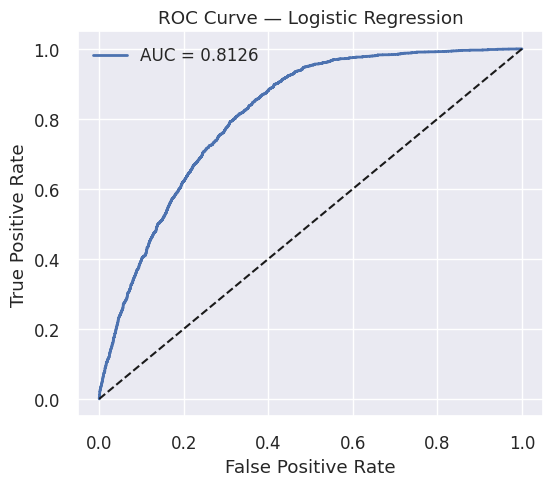

In [ ]:
fpr, tpr, _ = roc_curve(y_test, y_prob)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, linewidth=2, label=f"AUC = {auc:.4f}")
plt.plot([0,1], [0,1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve — Logistic Regression")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Base model
svm_base = SVC(
    kernel='rbf',
    class_weight='balanced',
    probability=True  # Needed for ROC-AUC
)

# Parameter search space
svm_param_grid = {
    "C": np.logspace(-2, 2, 12),             # [0.01 ... 100]
    "gamma": ['scale', 'auto'] + list(np.logspace(-3, 0, 8))  # [0.001 ... 1]
}

# Randomized search
svm_search = RandomizedSearchCV(
    estimator=svm_base,
    param_distributions=svm_param_grid,
    n_iter=20,
    scoring='roc_auc',
    cv=3,
    verbose=2,
    n_jobs=-1,
    random_state=42
)

svm_search.fit(X_train_scaled, y_train)

svm_best = svm_search.best_estimator_
print("\nBest SVM Parameters:", svm_search.best_params_)


Fitting 3 folds for each of 20 candidates, totalling 60 fits


KeyboardInterrupt: 

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Base SVM *without* probability for faster CV
svm_base = SVC(
    kernel='rbf',
    class_weight='balanced'
)

svm_param_grid = {
    "C": np.logspace(-2, 2, 8),                # 0.01 → 100
    "gamma": ['scale', 'auto'] + list(np.logspace(-3, 0, 4))  # 0.001 → 1
}

svm_search = RandomizedSearchCV(
    estimator=svm_base,
    param_distributions=svm_param_grid,
    n_iter=12,          # still “advanced”, but not insane
    scoring='roc_auc',
    cv=3,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

svm_search.fit(X_train_scaled, y_train)

print("Best SVM params (no-prob tuning):")
print(svm_search.best_params_)


Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best SVM params (no-prob tuning):
{'gamma': 'auto', 'C': np.float64(1.9306977288832496)}


In [ ]:
best_params = svm_search.best_params_

svm_best = SVC(
    kernel='rbf',
    class_weight='balanced',
    probability=True,      # only here we pay the probability cost once
    C=best_params["C"],
    gamma=best_params["gamma"]
)

svm_best.fit(X_train_scaled, y_train)


SVC(C=np.float64(1.9306977288832496), class_weight='balanced', gamma='auto',
    probability=True)


===== SVM (RBF, tuned) PERFORMANCE =====
Accuracy       : 0.7196
Precision      : 0.5788
Recall         : 0.8694
F1 Score       : 0.6949
ROC-AUC        : 0.8264

Confusion Matrix:
[[3121 1812]
 [ 374 2490]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.63      0.74      4933
           1       0.58      0.87      0.69      2864

    accuracy                           0.72      7797
   macro avg       0.74      0.75      0.72      7797
weighted avg       0.78      0.72      0.72      7797



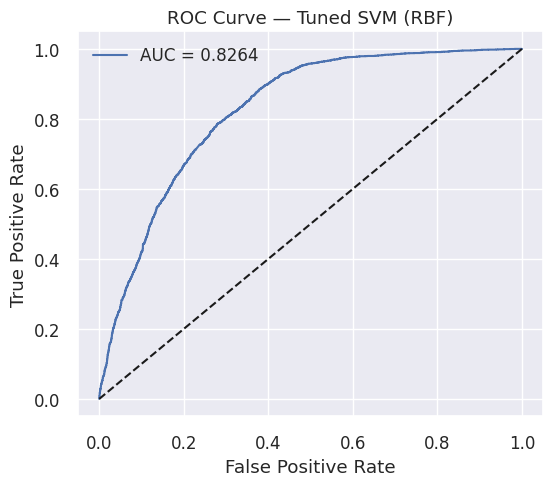

In [ ]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_auc_score, roc_curve
)
import matplotlib.pyplot as plt

svm_pred = svm_best.predict(X_test_scaled)
svm_prob = svm_best.predict_proba(X_test_scaled)[:, 1]

svm_acc  = accuracy_score(y_test, svm_pred)
svm_prec = precision_score(y_test, svm_pred)
svm_rec  = recall_score(y_test, svm_pred)
svm_f1   = f1_score(y_test, svm_pred)
svm_auc  = roc_auc_score(y_test, svm_prob)

print("\n===== SVM (RBF, tuned) PERFORMANCE =====")
print(f"Accuracy       : {svm_acc:.4f}")
print(f"Precision      : {svm_prec:.4f}")
print(f"Recall         : {svm_rec:.4f}")
print(f"F1 Score       : {svm_f1:.4f}")
print(f"ROC-AUC        : {svm_auc:.4f}")

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, svm_pred))

print("\nClassification Report:")
print(classification_report(y_test, svm_pred))

# ROC curve
fpr, tpr, _ = roc_curve(y_test, svm_prob)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"AUC = {svm_auc:.4f}")
plt.plot([0,1], [0,1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve — Tuned SVM (RBF)")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import tensorflow as tf
print("TensorFlow:", tf.__version__)
print("GPU Available:", tf.config.list_physical_devices('GPU'))

!pip -q install keras-tuner


TensorFlow: 2.19.0
GPU Available: []
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 kB 3.1 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.pipeline import Pipeline

# ---- X, y ----
X = data.drop(columns=["smoking"]).copy()
y = data["smoking"].astype(int).copy()

# Detect categorical-like columns: low unique integer/category columns
cat_cols = []
for c in X.columns:
    if str(X[c].dtype) == "category":
        cat_cols.append(c)
    elif (pd.api.types.is_integer_dtype(X[c]) or pd.api.types.is_object_dtype(X[c])) and X[c].nunique() <= 10:
        cat_cols.append(c)

cat_cols = sorted(list(set(cat_cols)))
num_cols = [c for c in X.columns if c not in cat_cols]

print("Categorical cols:", cat_cols)
print("Numeric cols:", len(num_cols))

# ---- Split: train / temp ----
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

# ---- Split: val / test (from temp) ----
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

print("Train/Val/Test:", X_train.shape, X_val.shape, X_test.shape)

# ---- Preprocessor ----
preprocessor = ColumnTransformer(
    transformers=[
        ("num", RobustScaler(), num_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols)
    ],
    remainder="drop"
)

# Fit on train only, transform all
X_train_p = preprocessor.fit_transform(X_train)
X_val_p   = preprocessor.transform(X_val)
X_test_p  = preprocessor.transform(X_test)

# Convert sparse to dense (Keras expects dense arrays)
if hasattr(X_train_p, "toarray"):
    X_train_p = X_train_p.toarray()
    X_val_p   = X_val_p.toarray()
    X_test_p  = X_test_p.toarray()

print("Final input dim:", X_train_p.shape[1])


Categorical cols: ['dental_caries', 'hearingleft', 'hearingright', 'urine_protein']
Numeric cols: 29
Train/Val/Test: (29238, 33) (4873, 33) (4873, 33)
Final input dim: 41


In [ ]:
from sklearn.utils.class_weight import compute_class_weight

classes = np.array([0, 1])
weights = compute_class_weight(class_weight="balanced", classes=classes, y=y_train.values)
class_weight = {0: weights[0], 1: weights[1]}
print("Class weights:", class_weight)


Class weights: {0: np.float64(0.7902589329152927), 1: np.float64(1.361299934817022)}


In [ ]:
import keras_tuner as kt
from tensorflow import keras
from tensorflow.keras import layers

input_dim = X_train_p.shape[1]

def build_model(hp):
    model = keras.Sequential()
    model.add(layers.Input(shape=(input_dim,)))

    # number of hidden layers
    n_layers = hp.Int("n_layers", min_value=2, max_value=5)

    for i in range(n_layers):
        units = hp.Int(f"units_{i}", min_value=64, max_value=512, step=64)
        model.add(layers.Dense(
            units,
            activation="relu",
            kernel_regularizer=keras.regularizers.l2(hp.Choice("l2", [0.0, 1e-5, 1e-4, 1e-3]))
        ))
        # BatchNorm improves tabular training stability
        model.add(layers.BatchNormalization())

        drop = hp.Float(f"dropout_{i}", min_value=0.0, max_value=0.5, step=0.1)
        if drop > 0:
            model.add(layers.Dropout(drop))

    model.add(layers.Dense(1, activation="sigmoid"))

    lr = hp.Choice("lr", [1e-2, 5e-3, 1e-3, 5e-4, 1e-4])
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=lr),
        loss="binary_crossentropy",
        metrics=[
            keras.metrics.BinaryAccuracy(name="acc"),
            keras.metrics.AUC(name="auc")
        ]
    )
    return model

tuner = kt.RandomSearch(
    build_model,
    objective=kt.Objective("val_auc", direction="max"),
    max_trials=25,              # increase if you want, but this is already strong
    executions_per_trial=1,
    overwrite=True,
    directory="kt_dir",
    project_name="smoking_dnn"
)

callbacks = [
    keras.callbacks.EarlyStopping(monitor="val_auc", mode="max", patience=8, restore_best_weights=True),
    keras.callbacks.ReduceLROnPlateau(monitor="val_auc", mode="max", factor=0.5, patience=4, min_lr=1e-6)
]

tuner.search(
    X_train_p, y_train.values,
    validation_data=(X_val_p, y_val.values),
    epochs=60,                  # early stopping will usually stop earlier
    batch_size=kt.engine.hyperparameters.HyperParameters().Choice("batch_size", [64, 128, 256]),
    callbacks=callbacks,
    class_weight=class_weight,
    verbose=1
)

best_hp = tuner.get_best_hyperparameters(1)[0]
print("Best hyperparameters:")
for k in best_hp.values:
    print(k, ":", best_hp.get(k))


Trial 25 Complete [00h 01m 28s]
val_auc: 0.8334356546401978

Best val_auc So Far: 0.8410440683364868
Total elapsed time: 01h 23m 52s
Best hyperparameters:
n_layers : 5
units_0 : 256
l2 : 0.0001
dropout_0 : 0.30000000000000004
units_1 : 128
dropout_1 : 0.0
lr : 0.0005
units_2 : 256
dropout_2 : 0.1
units_3 : 512
dropout_3 : 0.0
units_4 : 320
dropout_4 : 0.0


In [ ]:
best_model = tuner.hypermodel.build(best_hp)

history = best_model.fit(
    X_train_p, y_train.values,
    validation_data=(X_val_p, y_val.values),
    epochs=80,
    batch_size=128,
    callbacks=callbacks,
    class_weight=class_weight,
    verbose=1
)



Epoch 1/80
229/229 ━━━━━━━━━━━━━━━━━━━━ 14s 26ms/step - acc: 0.6790 - auc: 0.7555 - loss: 0.7434 - val_acc: 0.6844 - val_auc: 0.8016 - val_loss: 0.6764 - learning_rate: 5.0000e-04
Epoch 2/80
229/229 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - acc: 0.7190 - auc: 0.8095 - loss: 0.6387 - val_acc: 0.7219 - val_auc: 0.8154 - val_loss: 0.6399 - learning_rate: 5.0000e-04
Epoch 3/80
229/229 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - acc: 0.7279 - auc: 0.8231 - loss: 0.6163 - val_acc: 0.7193 - val_auc: 0.8190 - val_loss: 0.6343 - learning_rate: 5.0000e-04
Epoch 4/80
229/229 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - acc: 0.7340 - auc: 0.8322 - loss: 0.6031 - val_acc: 0.7244 - val_auc: 0.8245 - val_loss: 0.6079 - learning_rate: 5.0000e-04
Epoch 5/80
229/229 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - acc: 0.7371 - auc: 0.8337 - loss: 0.5982 - val_acc: 0.7234 - val_auc: 0.8255 - val_loss: 0.6141 - learning_rate: 5.0000e-04
Epoch 6/80
229/229 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - acc: 0.7410 - auc: 0.8376 - loss: 0.5898 - val_ac

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

# Probabilities
val_prob  = best_model.predict(X_val_p).ravel()
test_prob = best_model.predict(X_test_p).ravel()

# AUC (threshold-free)
val_auc = roc_auc_score(y_val, val_prob)
test_auc = roc_auc_score(y_test, test_prob)
print("Val AUC :", round(val_auc, 4))
print("Test AUC:", round(test_auc, 4))

# Threshold search on validation for BEST accuracy
thresholds = np.linspace(0.2, 0.8, 121)
best_t, best_acc = 0.5, -1

for t in thresholds:
    pred = (val_prob >= t).astype(int)
    acc = accuracy_score(y_val, pred)
    if acc > best_acc:
        best_acc = acc
        best_t = t

print("Best threshold (by VAL accuracy):", round(best_t, 3))
print("Best VAL accuracy:", round(best_acc, 4))

# Final test evaluation using best threshold
test_pred = (test_prob >= best_t).astype(int)

acc  = accuracy_score(y_test, test_pred)
prec = precision_score(y_test, test_pred)
rec  = recall_score(y_test, test_pred)
f1   = f1_score(y_test, test_pred)

print("\n===== Deep NN (Tuned) PERFORMANCE =====")
print(f"Accuracy  : {acc:.4f}")
print(f"Precision : {prec:.4f}")
print(f"Recall    : {rec:.4f}")
print(f"F1 Score  : {f1:.4f}")
print(f"ROC-AUC   : {test_auc:.4f}")

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, test_pred))

print("\nClassification Report:")
print(classification_report(y_test, test_pred))


153/153 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
Val AUC : 0.8338
Test AUC: 0.8397
Best threshold (by VAL accuracy): 0.675
Best VAL accuracy: 0.7576

===== Deep NN (Tuned) PERFORMANCE =====
Accuracy  : 0.7638
Precision : 0.6865
Recall    : 0.6562
F1 Score  : 0.6710
ROC-AUC   : 0.8397

Confusion Matrix:
[[2548  536]
 [ 615 1174]]

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.83      0.82      3084
           1       0.69      0.66      0.67      1789

    accuracy                           0.76      4873
   macro avg       0.75      0.74      0.74      4873
weighted avg       0.76      0.76      0.76      4873

